# Local Linear Regression to predict Closing Stock prices - Utkarsh Gaikwad

### Download the Stock data using yfinance API

In [339]:
import yfinance as yf
from warnings import filterwarnings
filterwarnings('ignore')
#Below is rolling Value higher value smoother the predicted trendline 
r = 14
df = yf.download('SBIN.NS',period='1y')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-02,434.750000,436.700012,431.799988,434.899994,428.217194,16926025
2021-08-03,434.950012,447.899994,433.600006,446.500000,439.638947,40922962
2021-08-04,448.649994,467.450012,441.500000,456.950012,449.928375,129761158
2021-08-05,461.000000,462.500000,438.399994,441.850006,435.060394,58595639
2021-08-06,443.700012,447.000000,434.000000,435.649994,428.955658,38236066


In [340]:
#Considering only Closing Values
df2 = df[['Close']]
df2.head()

,Close
Date,
2021-08-02,434.899994
2021-08-03,446.500000
2021-08-04,456.950012
2021-08-05,441.850006
2021-08-06,435.649994


### Adding a Day Column numbering each date with number 

In [341]:
d = []
for i in range(1,len(df2)+1):
    d.append(i)

In [342]:
df2['Day']=d

### Adding Extra variables to Calculate Slope and Intercept for each values

In [343]:
xy = []
x2 = []
for i in range(len(df)):
    xy.append(df2.Day[i]*df2.Close[i])
    x2.append((df2.Day[i])**2)

In [344]:
df2['xy']=xy
df2['x2']=x2
df2.head()

,Close,Day,xy,x2
Date,,,,
2021-08-02,434.899994,1,434.899994,1
2021-08-03,446.500000,2,893.000000,4
2021-08-04,456.950012,3,1370.850037,9
2021-08-05,441.850006,4,1767.400024,16
2021-08-06,435.649994,5,2178.249969,25


### Calculating Slope for each roll

In [345]:
df2['SNum']=r*df2.xy.rolling(r).sum()-(df2.Close.rolling(r).sum())*(df2.Day.rolling(r).sum())
df2['SDen']=r*df2.x2.rolling(r).sum()-(df2.Day.rolling(r).sum())**2
df2['Slope']=df2['SNum']/df2['SDen']

In [346]:
df2.tail()

,Close,Day,xy,x2,SNum,SDen,Slope
Date,,,,,,,
2022-07-26,514.200012,246,126493.203003,60516,8927.100128,3185.0,2.802857
2022-07-27,528.200012,247,130465.403015,61009,10830.050812,3185.0,3.400330
2022-07-28,532.450012,248,132047.603027,61504,12728.450043,3185.0,3.996374
2022-07-29,528.349976,249,131559.143921,62001,13602.398163,3185.0,4.270769
2022-08-01,533.750000,250,133437.500000,62500,14064.399017,3185.0,4.415824


### Calculating Intercept for each roll

In [347]:
df2['INum']=(df2.Close.rolling(r).sum()*df2.x2.rolling(r).sum())-(df2.Day.rolling(r).sum()*df2.xy.rolling(r).sum())
df2['Intercept']=df2['INum']/df2['SDen']

In [348]:
df2.tail()

,Close,Day,xy,x2,SNum,SDen,Slope,INum,Intercept
Date,,,,,,,,,
2022-07-26,514.200012,246,126493.203003,60516,8927.100128,3185.0,2.802857,-5.573705e+05,-174.998579
2022-07-27,528.200012,247,130465.403015,61009,10830.050812,3185.0,3.400330,-1.014527e+06,-318.532915
2022-07-28,532.450012,248,132047.603027,61504,12728.450043,3185.0,3.996374,-1.473834e+06,-462.742086
2022-07-29,528.349976,249,131559.143921,62001,13602.398163,3185.0,4.270769,-1.689360e+06,-530.411396
2022-08-01,533.750000,250,133437.500000,62500,14064.399017,3185.0,4.415824,-1.804358e+06,-566.517396


### Calculating prediction for each roll local regression

In [349]:
pred = []
for i in range(len(df2)):
    if i<r:
        pred.append(df2['Slope'][r-1]*df2.Day[i] + df2['Intercept'][r-1])
    else:
        pred.append(df2['Slope'][i]*df2.Day[i] + df2['Intercept'][i])

In [350]:
df2['Predicted_Close']=pred

In [351]:
df2.tail()

,Close,Day,xy,x2,SNum,SDen,Slope,INum,Intercept,Predicted_Close
Date,,,,,,,,,,
2022-07-26,514.200012,246,126493.203003,60516,8927.100128,3185.0,2.802857,-5.573705e+05,-174.998579,514.504288
2022-07-27,528.200012,247,130465.403015,61009,10830.050812,3185.0,3.400330,-1.014527e+06,-318.532915,521.348576
2022-07-28,532.450012,248,132047.603027,61504,12728.450043,3185.0,3.996374,-1.473834e+06,-462.742086,528.358576
2022-07-29,528.349976,249,131559.143921,62001,13602.398163,3185.0,4.270769,-1.689360e+06,-530.411396,533.009998
2022-08-01,533.750000,250,133437.500000,62500,14064.399017,3185.0,4.415824,-1.804358e+06,-566.517396,537.438571


In [352]:
df2['Error']=df2['Close']-df2['Predicted_Close']
df2['Upper']=df2['Predicted_Close'] + 3*df2.Error.rolling(r).std()
df2['Lower']=df2['Predicted_Close'] - 3*df2.Error.rolling(r).std() 
df2.tail()

,Close,Day,xy,x2,SNum,SDen,Slope,INum,Intercept,Predicted_Close,Error,Upper,Lower
Date,,,,,,,,,,,,,
2022-07-26,514.200012,246,126493.203003,60516,8927.100128,3185.0,2.802857,-5.573705e+05,-174.998579,514.504288,-0.304276,535.140192,493.868384
2022-07-27,528.200012,247,130465.403015,61009,10830.050812,3185.0,3.400330,-1.014527e+06,-318.532915,521.348576,6.851436,542.390193,500.306959
2022-07-28,532.450012,248,132047.603027,61504,12728.450043,3185.0,3.996374,-1.473834e+06,-462.742086,528.358576,4.091436,549.486374,507.230778
2022-07-29,528.349976,249,131559.143921,62001,13602.398163,3185.0,4.270769,-1.689360e+06,-530.411396,533.009998,-4.660023,554.606342,511.413654
2022-08-01,533.750000,250,133437.500000,62500,14064.399017,3185.0,4.415824,-1.804358e+06,-566.517396,537.438571,-3.688571,558.717671,516.159470


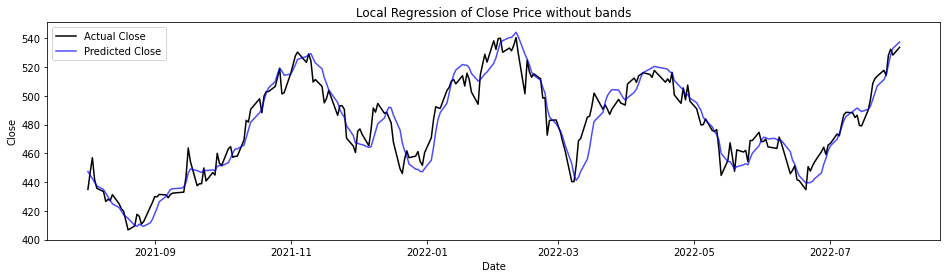

In [353]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.plot(df2.Close,color='black',label='Actual Close')
plt.plot(df2['Predicted_Close'],color = 'blue', label='Predicted Close',alpha=0.7)
plt.title('Local Regression of Close Price without bands')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

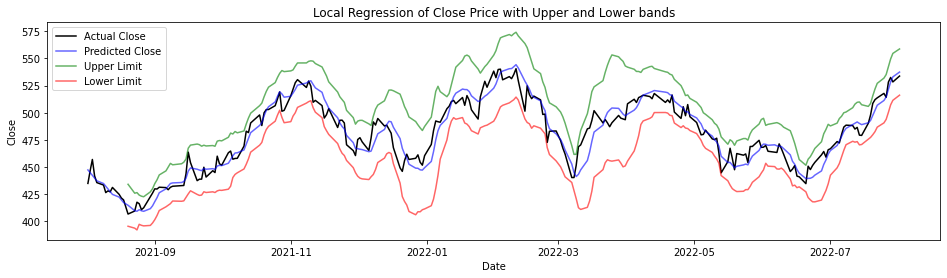

In [354]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.plot(df2.Close,color='black',label='Actual Close')
plt.plot(df2['Predicted_Close'],color = 'blue', label='Predicted Close',alpha=0.6)
plt.plot(df2['Upper'],color='green',label='Upper Limit',alpha=0.6)
plt.plot(df2['Lower'],color='red',label='Lower Limit',alpha=0.6)
plt.title('Local Regression of Close Price with Upper and Lower bands')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

In [355]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(df2['Predicted_Close'],df2.Close)
r2 = r2_score(df2['Predicted_Close'],df2.Close)

In [356]:
print('Mean Squared Error is      : ',round(mse,2))
print('Root Mean Squared Error is : ',round(mse**0.5,2))
print('R2 Score is                : ',round(r2,4))

Mean Squared Error is      :  81.57
Root Mean Squared Error is :  9.03
R2 Score is                :  0.9257


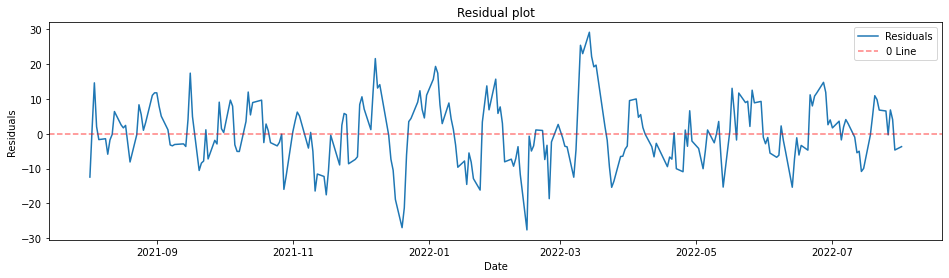

In [357]:
plt.figure(figsize=(16,4))
plt.plot(df2.Error,label='Residuals')
plt.axhline(0,linestyle='--',alpha=0.5,color='red',label='0 Line')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.legend()
plt.show()

In [358]:
t = df2['Day'][-1]+1

In [359]:
p = t*df2['Slope'][-1]+df2['Intercept'][-1]
pstd = df2.Error.rolling(r).std()[-1]
u = p + 3*pstd
l = p - 3*pstd

In [360]:
df2.tail(1)

,Close,Day,xy,x2,SNum,SDen,Slope,INum,Intercept,Predicted_Close,Error,Upper,Lower
Date,,,,,,,,,,,,,
2022-08-01,533.75,250,133437.5,62500,14064.399017,3185.0,4.415824,-1.804358e+06,-566.517396,537.438571,-3.688571,558.717671,516.15947


In [361]:
print('Tomorrows Close Price Prediction   : ',round(p,2),'+/-',round(3*pstd,2))
print('Upper Limit Close Price Prediction : ',round(u,2))
print('Lower Limit Close Price Prediction : ',round(l,2))

Tomorrows Close Price Prediction   :  541.85 +/- 21.28
Upper Limit Close Price Prediction :  563.13
Lower Limit Close Price Prediction :  520.58
